<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


C:\Users\tomek\AppData\Local\Temp\ipykernel_48812\792376755.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=telco_data, x="Churn", palette="pastel")


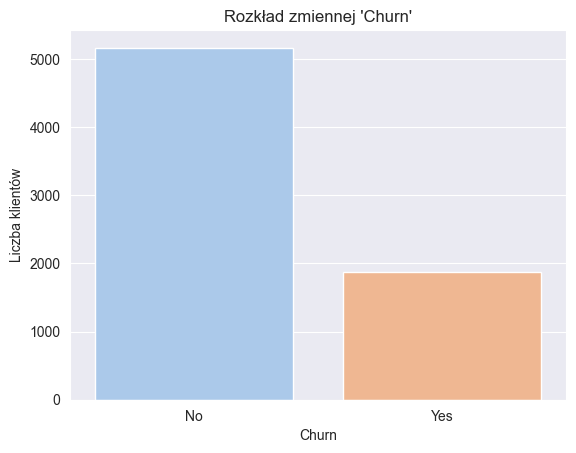

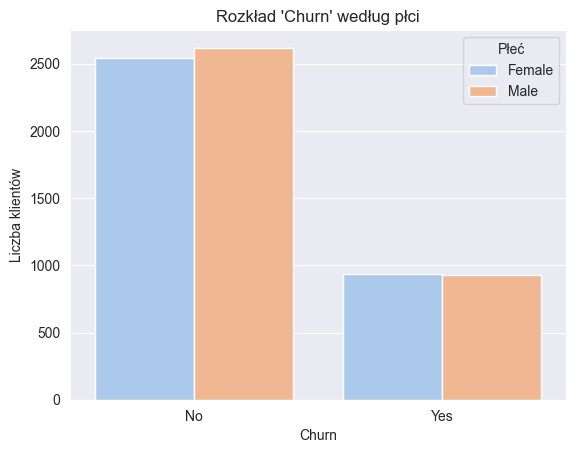

C:\Users\tomek\AppData\Local\Temp\ipykernel_48812\792376755.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=telco_data, x="Churn", y="TotalCharges", palette="pastel")


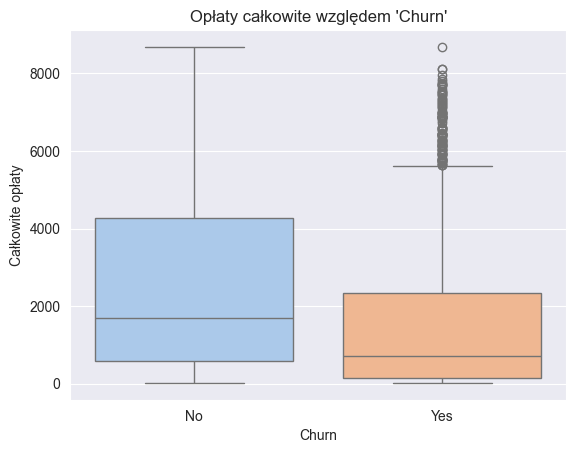

C:\Users\tomek\AppData\Local\Temp\ipykernel_48812\792376755.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=telco_data, x="Churn", y="tenure", palette="pastel")


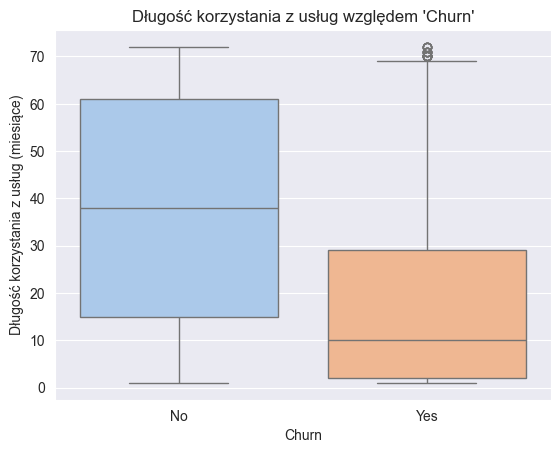

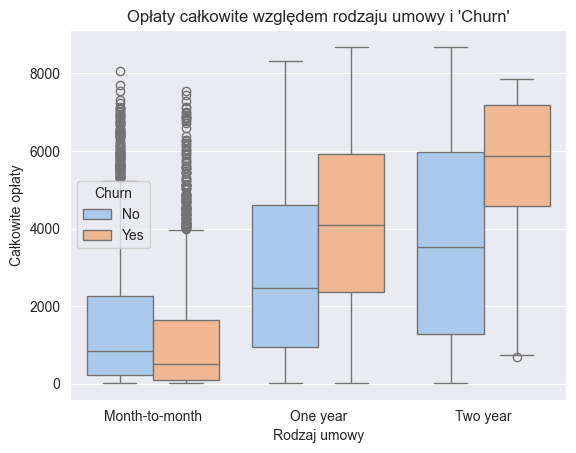

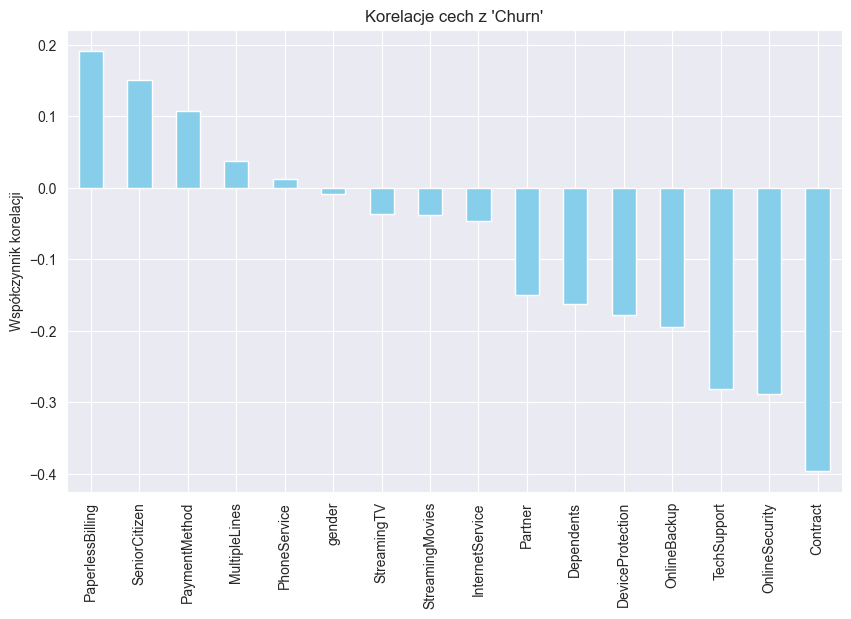

Rodzaje umów: ['Month-to-month' 'One year' 'Two year']


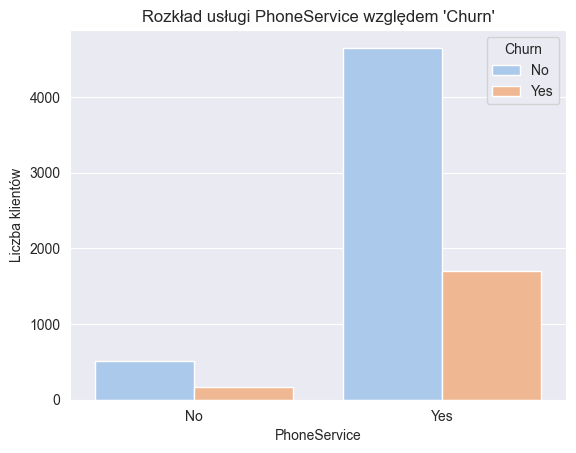

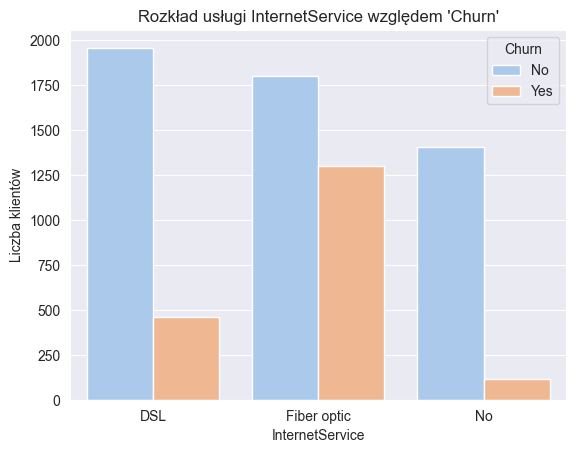

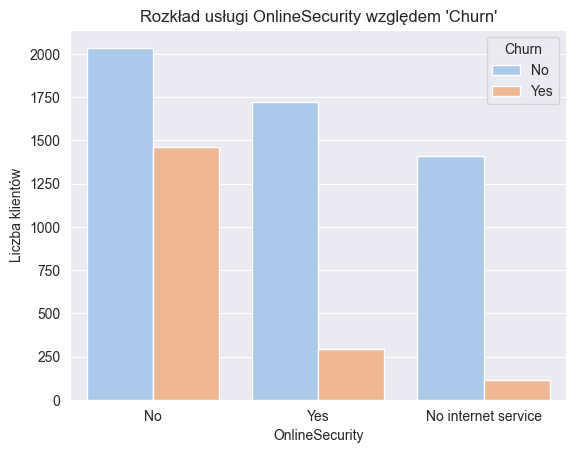

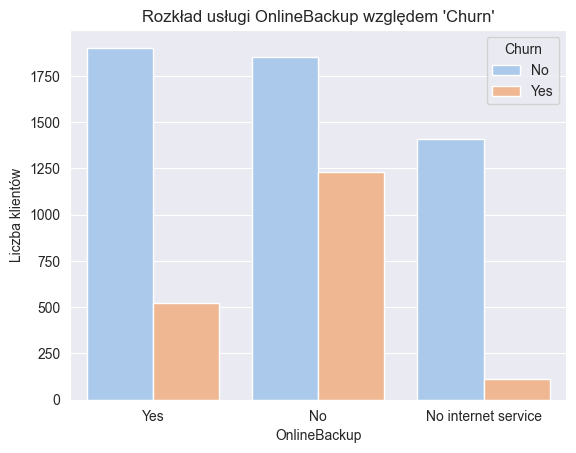

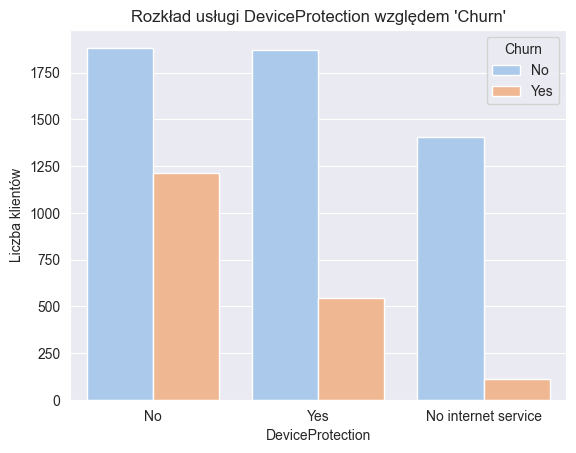

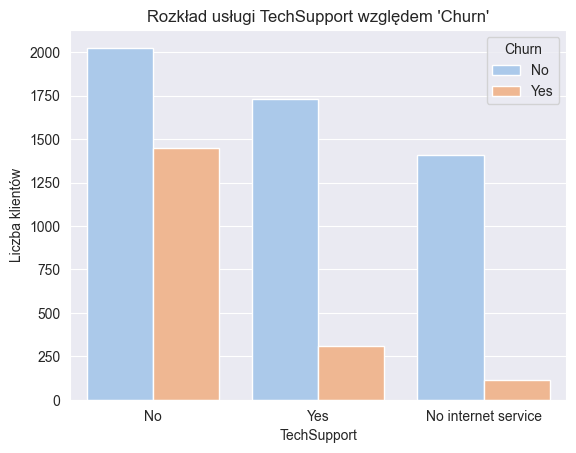

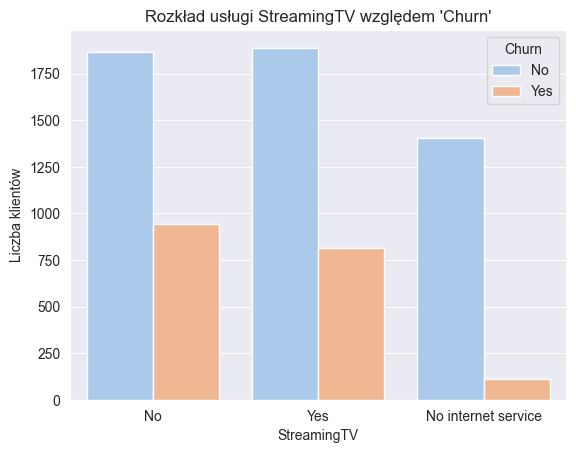

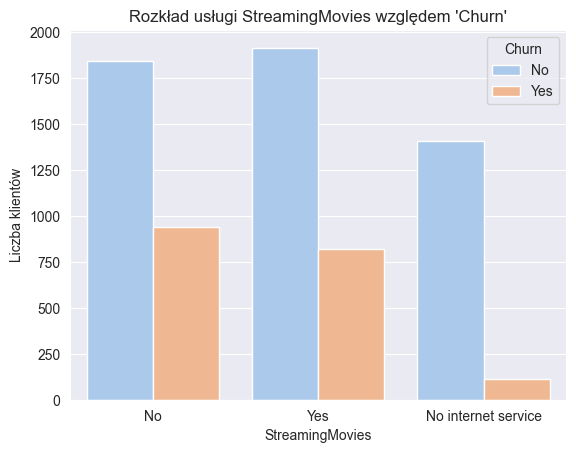

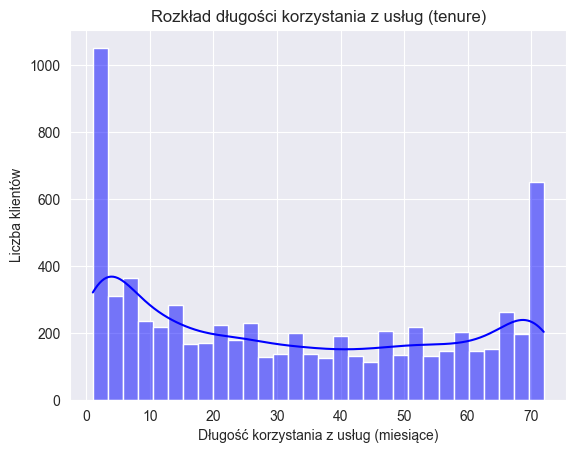

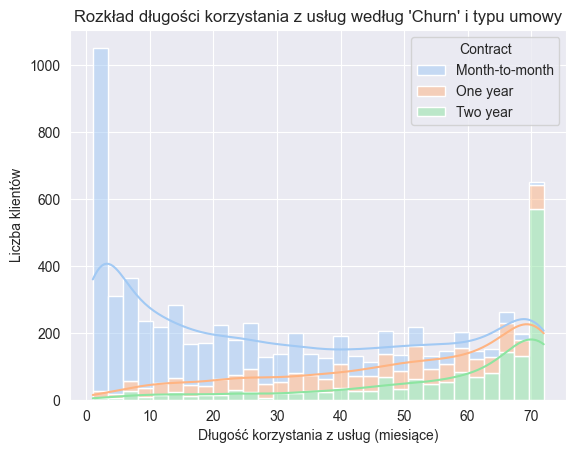

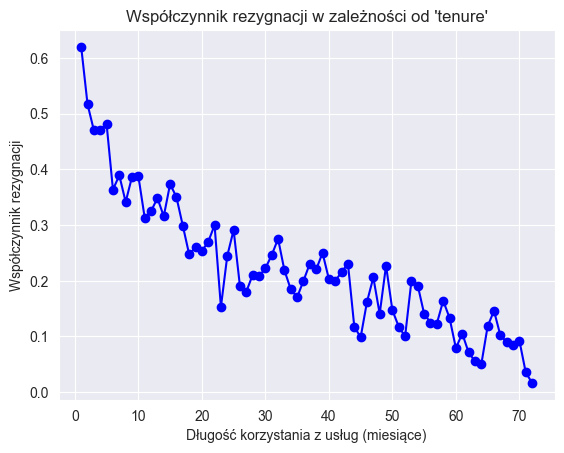

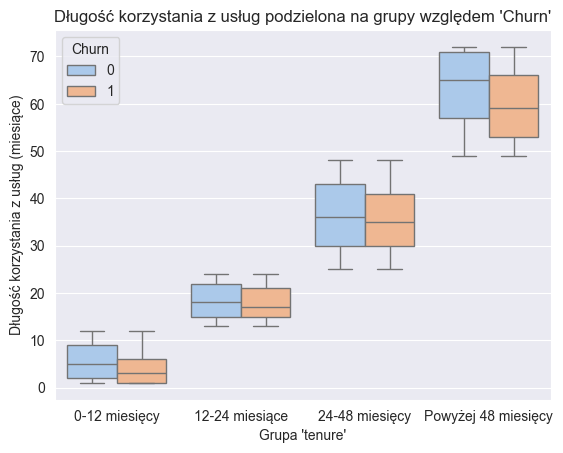

In [3]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Wczytanie danych
telco_data = pd.read_csv("Telco-Customer-Churn.csv")
data_dumies = pd.get_dummies(telco_data, drop_first=False)

# 1.1. Sprawdzenie typów danych i podstawowe statystyki
telco_data['TotalCharges'] = pd.to_numeric(telco_data['TotalCharges'], errors='coerce')
telco_data = telco_data.dropna()  # Usunięcie brakujących wartości
print(telco_data.info())
print(telco_data.describe(include="all"))

# 1.2. Utworzenie wykresów słupkowych
# 1.2.1. Ilości wystąpień kategorii w zmiennej decyzyjnej
sns.countplot(data=telco_data, x="Churn", palette="pastel")
plt.title("Rozkład zmiennej 'Churn'")
plt.xlabel("Churn")
plt.ylabel("Liczba klientów")
plt.show()

# 1.2.2. Zmienna decyzyjna według płci
sns.countplot(data=telco_data, x="Churn", hue="gender", palette="pastel")
plt.title("Rozkład 'Churn' według płci")
plt.xlabel("Churn")
plt.ylabel("Liczba klientów")
plt.legend(title="Płeć")
plt.show()

# 1.3. Wykresy pudełkowe
# 1.3.1. Rozkład całkowitych opłat (TotalCharges) względem 'Churn'
sns.boxplot(data=telco_data, x="Churn", y="TotalCharges", palette="pastel")
plt.title("Opłaty całkowite względem 'Churn'")
plt.xlabel("Churn")
plt.ylabel("Całkowite opłaty")
plt.show()

# 1.3.2. Rozkład 'Churn' względem długości korzystania z usług (tenure)
sns.boxplot(data=telco_data, x="Churn", y="tenure", palette="pastel")
plt.title("Długość korzystania z usług względem 'Churn'")
plt.xlabel("Churn")
plt.ylabel("Długość korzystania z usług (miesiące)")
plt.show()

# 1.4. Opłaty całkowite względem rodzaju umowy i 'Churn'
sns.boxplot(data=telco_data, x="Contract", y="TotalCharges", hue="Churn", palette="pastel")
plt.title("Opłaty całkowite względem rodzaju umowy i 'Churn'")
plt.xlabel("Rodzaj umowy")
plt.ylabel("Całkowite opłaty")
plt.legend(title="Churn")
plt.show()

# 1.5. Korelacje cech z 'Churn'

from sklearn.preprocessing import LabelEncoder

telco_data_encoded = telco_data.drop(columns=["customerID", "tenure", "MonthlyCharges", "TotalCharges"])

for col in telco_data_encoded.select_dtypes(include='object').columns:
    telco_data_encoded[col] = LabelEncoder().fit_transform(telco_data_encoded[col])

correlation = telco_data_encoded.corr()["Churn"].sort_values(ascending=False).drop("Churn")

plt.figure(figsize=(10, 6))
correlation.plot(kind="bar", color="skyblue")
plt.title("Korelacje cech z 'Churn'")
plt.ylabel("Współczynnik korelacji")
plt.show()

# 1.6. Rodzaje zawieranych umów
print("Rodzaje umów:", telco_data["Contract"].unique())

# 1.7. Rozkład różnych usług używanych przez klientów
services = ["PhoneService", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
for service in services:
    sns.countplot(data=telco_data, x=service, hue="Churn", palette="pastel")
    plt.title(f"Rozkład usługi {service} względem 'Churn'")
    plt.xlabel(service)
    plt.ylabel("Liczba klientów")
    plt.legend(title="Churn")
    plt.show()

# 1.8. Histogram długości korzystania z usług (tenure)
sns.histplot(data=telco_data, x="tenure", bins=30, kde=True, color="blue")
plt.title("Rozkład długości korzystania z usług (tenure)")
plt.xlabel("Długość korzystania z usług (miesiące)")
plt.ylabel("Liczba klientów")
plt.show()

# 1.9. Histogram długości korzystania z usług według 'Churn' i typu umowy
sns.histplot(data=telco_data, x="tenure", bins=30, kde=True, hue="Contract", multiple="stack", palette="pastel")
plt.title("Rozkład długości korzystania z usług według 'Churn' i typu umowy")
plt.xlabel("Długość korzystania z usług (miesiące)")
plt.ylabel("Liczba klientów")
plt.show()

# 1.10. Współczynnik rezygnacji dla każdej kohorty (tenure)
# Upewnij się, że kolumna 'Churn' jest numeryczna
telco_data['Churn'] = telco_data['Churn'].map({'Yes': 1, 'No': 0})

# Obliczenie współczynnika rezygnacji (średnia wartości 'Churn' w grupach 'tenure')
churn_rates = telco_data.groupby("tenure")["Churn"].mean()

# Wykres współczynnika rezygnacji
plt.plot(churn_rates.index, churn_rates.values, marker="o", color="blue")
plt.title("Współczynnik rezygnacji w zależności od 'tenure'")
plt.xlabel("Długość korzystania z usług (miesiące)")
plt.ylabel("Współczynnik rezygnacji")
plt.show()


# 1.11. Zależność współczynnika rezygnacji od 'tenure'
# (Realizowane w punkcie 1.10, ponieważ wykres jest już opisany jako zależność).

# 1.12. Podział 'tenure' na grupy
bins = [0, 12, 24, 48, np.inf]
labels = ['0-12 miesięcy', '12-24 miesiące', '24-48 miesięcy', 'Powyżej 48 miesięcy']
telco_data["tenure_group"] = pd.cut(telco_data["tenure"], bins=bins, labels=labels)

# 1.13. Wykres pudełkowy dla grup 'tenure' względem 'Churn'
sns.boxplot(data=telco_data, x="tenure_group", y="tenure", hue="Churn", palette="pastel")
plt.title("Długość korzystania z usług podzielona na grupy względem 'Churn'")
plt.xlabel("Grupa 'tenure'")
plt.ylabel("Długość korzystania z usług (miesiące)")
plt.legend(title="Churn")
plt.show()


In [4]:
from sklearn.model_selection import train_test_split

# 2.1. Podział danych na macierz cech (X) i etykiety (y)
X = telco_data_encoded.drop(columns=["Churn"])
y = telco_data_encoded["Churn"]

# 2.2. Podział na zbiór treningowy i testowy z zachowaniem random_state=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1100, random_state=42)

print("Rozmiar zbioru treningowego (X_train):", X_train.shape)
print("Rozmiar zbioru testowego (X_test):", X_test.shape)
print("Rozmiar etykiet treningowych (y_train):", y_train.shape)
print("Rozmiar etykiet testowych (y_test):", y_test.shape)


Rozmiar zbioru treningowego (X_train): (5932, 16)
Rozmiar zbioru testowego (X_test): (1100, 16)
Rozmiar etykiet treningowych (y_train): (5932,)
Rozmiar etykiet testowych (y_test): (1100,)


Raport klasyfikacji dla drzewa decyzyjnego:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       804
           1       0.46      0.47      0.46       296

    accuracy                           0.71      1100
   macro avg       0.63      0.63      0.63      1100
weighted avg       0.71      0.71      0.71      1100



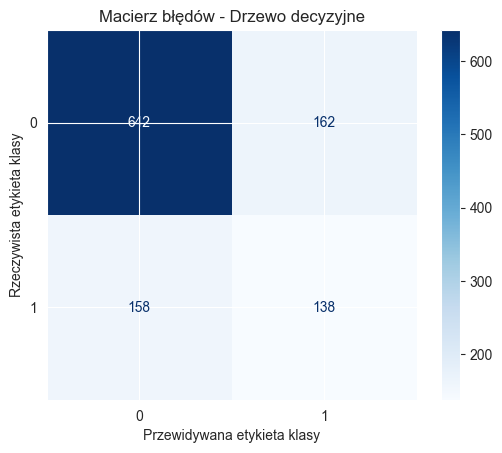

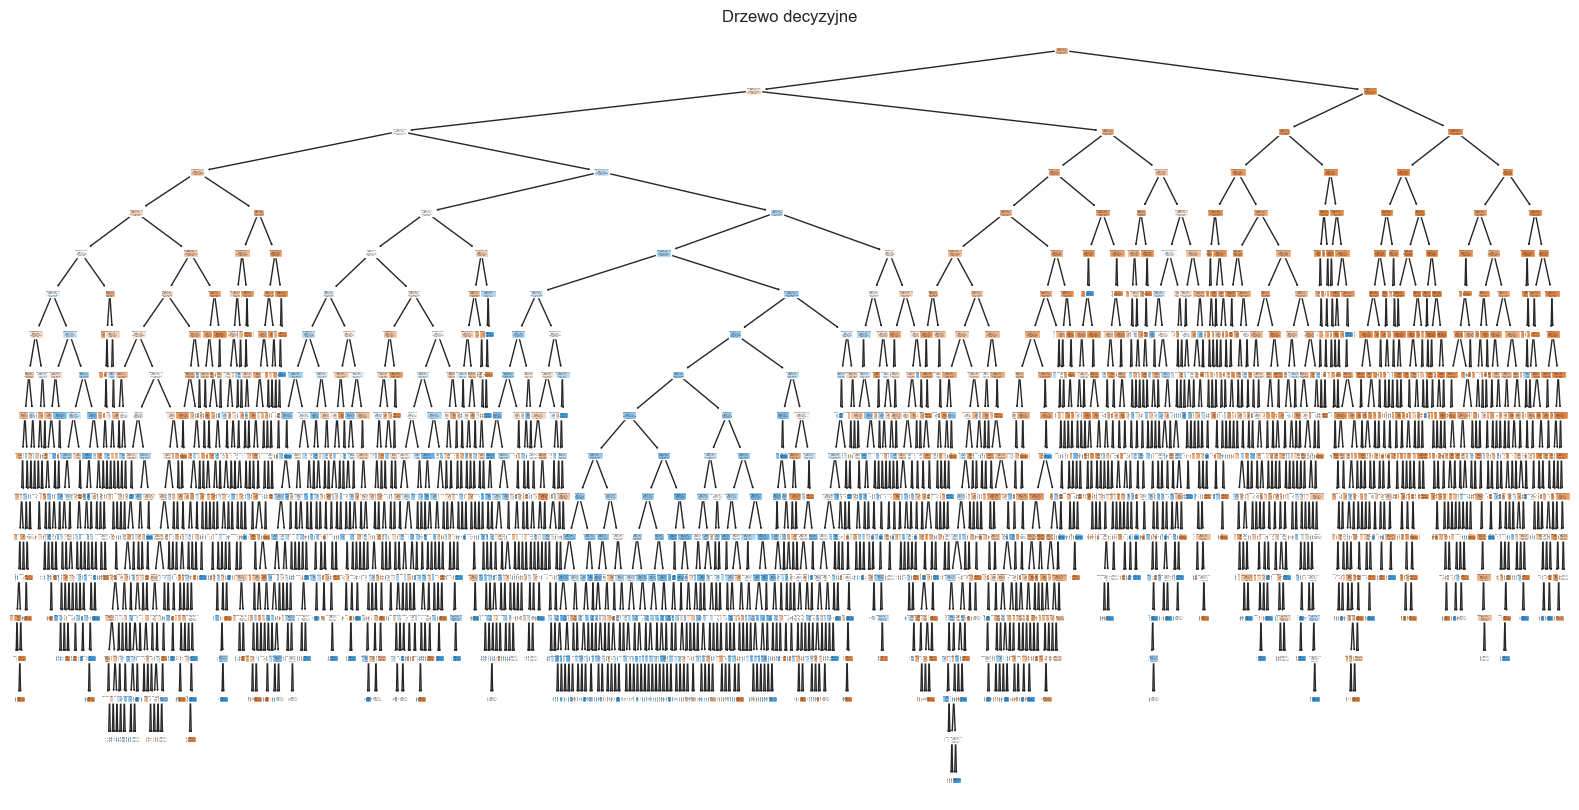

Ważność cech:
Contract            0.228018
PaymentMethod       0.096529
DeviceProtection    0.064785
OnlineSecurity      0.062771
OnlineBackup        0.058513
StreamingMovies     0.056493
gender              0.055231
PaperlessBilling    0.054940
SeniorCitizen       0.052907
StreamingTV         0.050680
MultipleLines       0.049173
Partner             0.048153
InternetService     0.041086
Dependents          0.037008
TechSupport         0.034965
PhoneService        0.008747
dtype: float64


In [10]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 3.1. Utworzenie modelu drzewa decyzyjnego z domyślnymi parametrami
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

# 3.2. Predykcja na zbiorze testowym
y_pred_tree = tree_clf.predict(X_test)

# Wyświetlenie raportu klasyfikacji
print("Raport klasyfikacji dla drzewa decyzyjnego:")
print(classification_report(y_test, y_pred_tree))

# Wyświetlenie macierzy błędów
cm = confusion_matrix(y_test, y_pred_tree, labels=tree_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree_clf.classes_)
disp.plot(cmap="Blues")
plt.xlabel("Przewidywana etykieta klasy")
plt.ylabel("Rzeczywista etykieta klasy")
plt.title("Macierz błędów - Drzewo decyzyjne")
plt.show()

# 3.3. Wizualizacja drzewa decyzyjnego
plt.figure(figsize=(20, 10))
plot_tree(tree_clf, feature_names=X.columns, class_names=["No", "Yes"], filled=True)
plt.title("Drzewo decyzyjne")
plt.show()

# Wyświetlenie ważności cech
feature_importances = pd.Series(tree_clf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Ważność cech:")
print(feature_importances)


Raport klasyfikacji dla K-Najbliższych Sąsiadów:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       804
           1       0.50      0.46      0.48       296

    accuracy                           0.73      1100
   macro avg       0.65      0.64      0.65      1100
weighted avg       0.72      0.73      0.73      1100



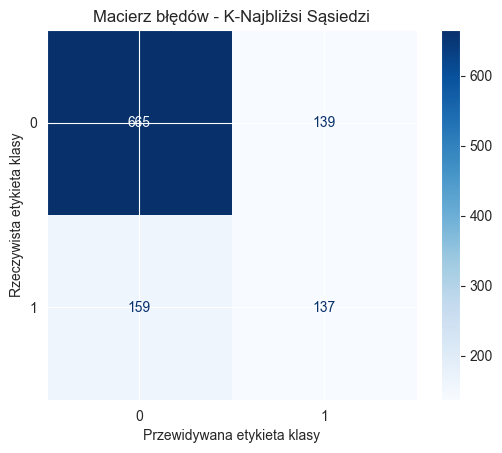

In [7]:
from sklearn.neighbors import KNeighborsClassifier

# 4.1. Utworzenie modelu K-Najbliższych Sąsiadów z domyślnymi parametrami
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

# 4.2. Predykcja na zbiorze testowym
y_pred_knn = knn_clf.predict(X_test)

print("Raport klasyfikacji dla K-Najbliższych Sąsiadów:")
print(classification_report(y_test, y_pred_knn))

# Wyświetlenie macierzy błędów
cm_knn = confusion_matrix(y_test, y_pred_knn, labels=knn_clf.classes_)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=knn_clf.classes_)
disp_knn.plot(cmap="Blues")
plt.xlabel("Przewidywana etykieta klasy")
plt.ylabel("Rzeczywista etykieta klasy")
plt.title("Macierz błędów - K-Najbliżsi Sąsiedzi")
plt.show()


Raport klasyfikacji - Regresja Logistyczna (ustawienia domyślne):
              precision    recall  f1-score   support

    No Churn       0.81      0.87      0.84       804
       Churn       0.56      0.44      0.50       296

    accuracy                           0.76      1100
   macro avg       0.69      0.66      0.67      1100
weighted avg       0.74      0.76      0.75      1100



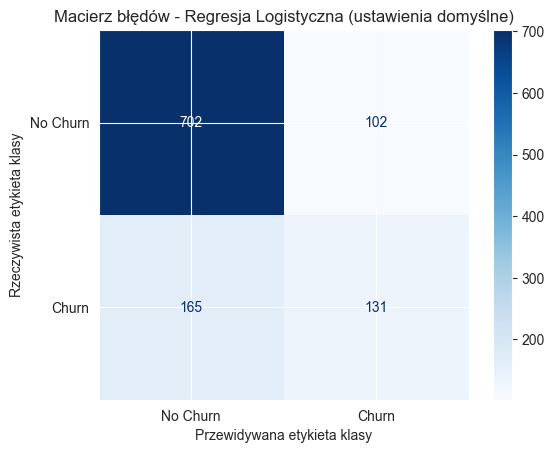

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

logreg_default = LogisticRegression(random_state=42, max_iter=1000)
logreg_default.fit(X_train, y_train)

y_pred_logreg = logreg_default.predict(X_test)

# Generowanie raportu z klasyfikacji
print("Raport klasyfikacji - Regresja Logistyczna (ustawienia domyślne):")
print(classification_report(y_test, y_pred_logreg, target_names=["No Churn", "Churn"]))

# Rysowanie macierzy błędów
ConfusionMatrixDisplay.from_estimator(
    logreg_default, X_test, y_test, display_labels=["No Churn", "Churn"], cmap="Blues"
)
plt.title("Macierz błędów - Regresja Logistyczna (ustawienia domyślne)")
plt.xlabel("Przewidywana etykieta klasy")
plt.ylabel("Rzeczywista etykieta klasy")
plt.show()



Classification Report for Decision Tree - Default:
              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1300
           1       0.48      0.48      0.48       458

    accuracy                           0.73      1758
   macro avg       0.65      0.65      0.65      1758
weighted avg       0.73      0.73      0.73      1758



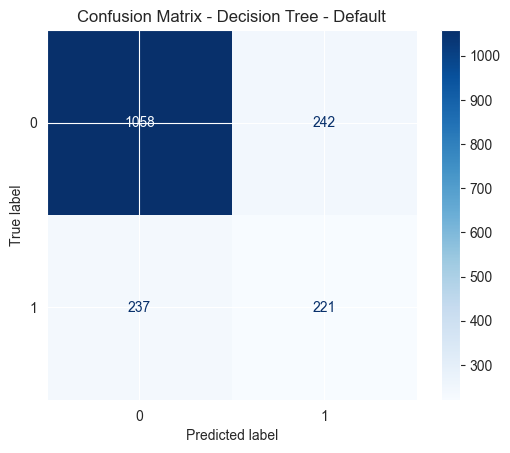

Classification Report for K-Nearest Neighbors - Default:
              precision    recall  f1-score   support

           0       0.82      0.83      0.82      1300
           1       0.49      0.47      0.48       458

    accuracy                           0.73      1758
   macro avg       0.65      0.65      0.65      1758
weighted avg       0.73      0.73      0.73      1758



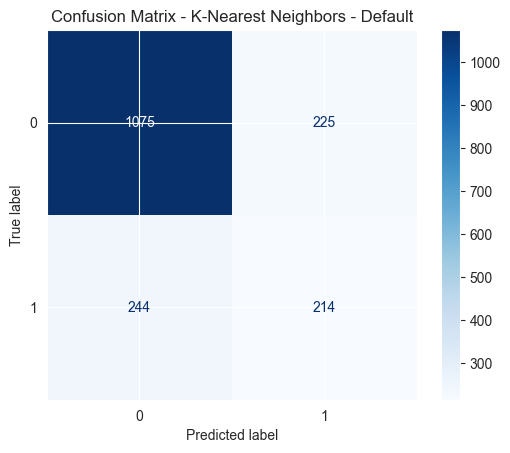

Classification Report for Logistic Regression - Default:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1300
           1       0.57      0.50      0.53       458

    accuracy                           0.77      1758
   macro avg       0.70      0.68      0.69      1758
weighted avg       0.76      0.77      0.77      1758



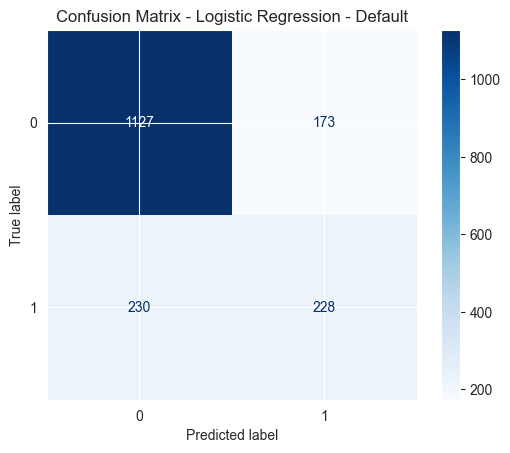

Classification Report for Decision Tree - Optimized:
              precision    recall  f1-score   support

           0       0.83      0.84      0.84      1300
           1       0.54      0.52      0.53       458

    accuracy                           0.76      1758
   macro avg       0.69      0.68      0.68      1758
weighted avg       0.76      0.76      0.76      1758



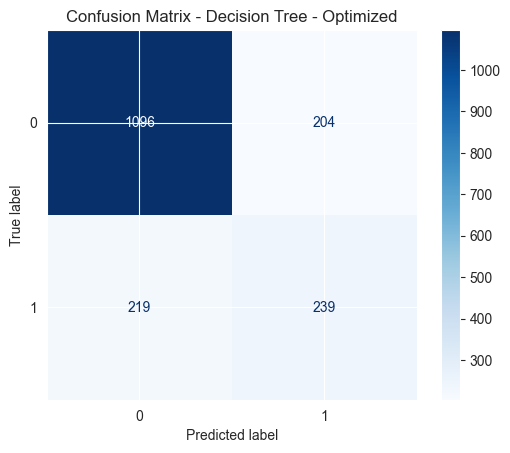

Classification Report for K-Nearest Neighbors - Optimized:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1300
           1       0.54      0.55      0.55       458

    accuracy                           0.76      1758
   macro avg       0.69      0.69      0.69      1758
weighted avg       0.76      0.76      0.76      1758



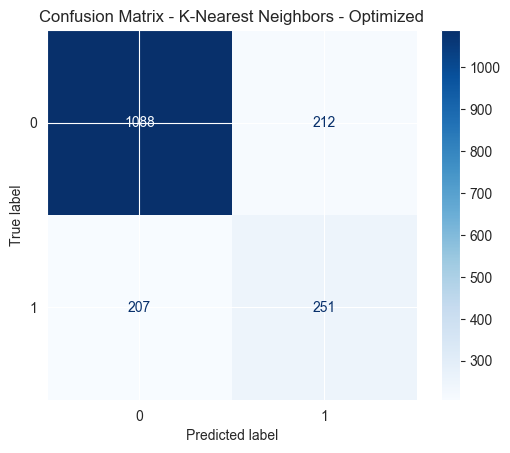

Classification Report for Logistic Regression - Optimized:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1300
           1       0.57      0.50      0.53       458

    accuracy                           0.77      1758
   macro avg       0.70      0.68      0.69      1758
weighted avg       0.76      0.77      0.77      1758



C:\Users\tomek\Documents\MAGISTERSKIE\3sem\Playground5.0\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\tomek\Documents\MAGISTERSKIE\3sem\Playground5.0\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tomek\Documents\MAGISTERSKIE\3sem\Playground5.0\.venv\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\tomek\Documents\MAGISTERSKIE\3sem\Playground5.0\.venv\

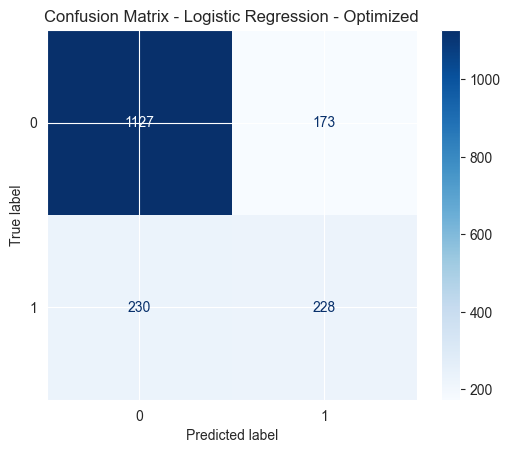


Decision Tree:
  Default F1-Score: 0.4799
  Optimized F1-Score: 0.5305

K-Nearest Neighbors:
  Default F1-Score: 0.4771
  Optimized F1-Score: 0.5451

Logistic Regression:
  Default F1-Score: 0.5308
  Optimized F1-Score: 0.5308


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Wczytanie i przygotowanie danych
telco_data = pd.read_csv("Telco-Customer-Churn.csv")

# Wstępne przetwarzanie danych
telco_data['TotalCharges'] = pd.to_numeric(telco_data['TotalCharges'], errors='coerce')
telco_data = telco_data.dropna()
telco_data['Churn'] = telco_data['Churn'].map({'Yes': 1, 'No': 0})

telco_data_encoded = telco_data.drop(columns=["customerID", "tenure", "MonthlyCharges", "TotalCharges"])
for col in telco_data_encoded.select_dtypes(include='object').columns:
    telco_data_encoded[col] = pd.factorize(telco_data_encoded[col])[0]

X = telco_data_encoded.drop(columns=["Churn"])
y = telco_data_encoded["Churn"]

# Podział na zbiory
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Funkcja do oceny modelu
def evaluate_model(model, X_test, y_test, name):
    y_pred = model.predict(X_test)
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot(cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()
    return classification_report(y_test, y_pred, output_dict=True)

# **6.1. Niezoptymalizowane modele**
# Drzewo decyzyjne
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
report_tree_default = evaluate_model(tree_clf, X_test, y_test, "Decision Tree - Default")

# K-Najbliżsi Sąsiedzi
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
report_knn_default = evaluate_model(knn_clf, X_test, y_test, "K-Nearest Neighbors - Default")

# Regresja logistyczna
logreg_default = LogisticRegression(random_state=42, max_iter=1000)
logreg_default.fit(X_train, y_train)
report_logreg_default = evaluate_model(logreg_default, X_test, y_test, "Logistic Regression - Default")

# **6.2. Optymalizacja hiperparametrów**
# Drzewo decyzyjne
tree_params = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}
tree_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), tree_params, cv=5, scoring='f1')
tree_grid.fit(X_train, y_train)
best_tree_clf = tree_grid.best_estimator_
report_tree_optimized = evaluate_model(best_tree_clf, X_test, y_test, "Decision Tree - Optimized")

# K-Najbliżsi Sąsiedzi
knn_params = {
    'n_neighbors': range(1, 21),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
knn_random = RandomizedSearchCV(KNeighborsClassifier(), knn_params, n_iter=20, cv=5, scoring='f1', random_state=42)
knn_random.fit(X_train, y_train)
best_knn_clf = knn_random.best_estimator_
report_knn_optimized = evaluate_model(best_knn_clf, X_test, y_test, "K-Nearest Neighbors - Optimized")

# Regresja logistyczna
logreg_params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2', 'none'],
    'solver': ['lbfgs', 'saga']
}
logreg_grid = GridSearchCV(LogisticRegression(random_state=42, max_iter=1000), logreg_params, cv=5, scoring='f1')
logreg_grid.fit(X_train, y_train)
best_logreg_clf = logreg_grid.best_estimator_
report_logreg_optimized = evaluate_model(best_logreg_clf, X_test, y_test, "Logistic Regression - Optimized")

# **6.3. Porównanie wyników**
# Porównanie raportów klasyfikacji
results = {
    "Decision Tree": {"Default": report_tree_default, "Optimized": report_tree_optimized},
    "K-Nearest Neighbors": {"Default": report_knn_default, "Optimized": report_knn_optimized},
    "Logistic Regression": {"Default": report_logreg_default, "Optimized": report_logreg_optimized},
}

# Znalezienie najlepszego modelu
for model_name, reports in results.items():
    print(f"\n{model_name}:")
    for version, report in reports.items():
        print(f"  {version} F1-Score: {report['1']['f1-score']:.4f}")
